# Single model evaluations in Process
When understanding or investigating an individual model within Process, it can be useful to run the model in isolation and plot some responses. This is done here to investigate the effect of tungsten impurity concentration on radiated power and power incident on the divertor.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import process
from process.main import SingleRun

## Set up
First, inspect a variable to check its uninitialised value:

In [2]:
print(
    f"p_plasma_separatrix_mw = {process.data_structure.physics_variables.p_plasma_separatrix_mw}"
)

p_plasma_separatrix_mw = None


In order to initialise all variables in Process with their values at a given point (design parameter vector), run an evaluation input file (one with no optimisation) to initialise values in all models. The "large tokamak" regression test solution is used here.

In [3]:
single_run = SingleRun("data/large_tokamak_eval_IN.DAT")
single_run.run()

The IN.DAT file does not contain any obsolete variables.
 
**************************************************************************************************************
************************************************** PROCESS ***************************************************
************************************** Power Reactor Optimisation Code ***************************************
**************************************************************************************************************
 
Version : 3.1.0
Git Tag : v3.2.0-34-g124a7eea
Git Branch : main
Date : 02/10/2025 UTC
Time : 12:58
User : graeme
Computer : oldstar
Directory : /home/graeme/Projects/PROCESS/examples
Input : /home/graeme/Projects/PROCESS/examples/data/large_tokamak_eval_IN.DAT
Run title : generic large tokamak
Run type : Reactor concept design: Pulsed tokamak model, (c) UK Atomic Energy Authority
 
**************************************************************************************************************

/home/graeme/Projects/PROCESS/process/init.py:92: UserWarning: temp_cs_superconductor_margin_min and tmargmin should not both be specified in IN.DAT temp_cs_superconductor_margin_min has been ignored
  check_process(inputs)
/home/graeme/Projects/PROCESS/process/physics.py:7461: RuntimeWarning: divide by zero encountered in scalar divide
  * (nd_plasma_pedestal_electron / n_greenwald) ** -0.174
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
/home/graeme/Projects/PROCESS/process/costs.py:3030: RuntimeWarning: invalid value encountered in sqrt
  annoam = cost_variables.ucoam[cost_variables.lsa - 1] * np.sqrt(
/home/graeme/Projects/PROCESS/process/costs.py:3101: RuntimeWarning: invalid value encountered in sqrt
  annwst = cost_variables.ucwst[cost_variables.lsa - 1] * np.sqrt(
dr_tf_plasma_case to small to accommodate the WP, forced t

 
************************************ PROCESS found a consistent solution *************************************
 


Diamagnetic fraction is more than 1%, but not calculated. Consider using i_diamagnetic_current=2 and i_pfirsch_schluter_current=1
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
CS not using max current density: further optimisation may be possible


******************************************** Errors and Warnings *********************************************

 
******************************************* End of PROCESS Output ********************************************
 


In [4]:
import numpy as np
import matplotlib.pyplot as plt

def tresca_equivalent(sig_hoop, sig_axial=0.0, include_axial=True):
    """
    Compute Tresca equivalent (max shear) stress for CS.
    """
    if include_axial:
        return max(
            abs(sig_hoop - sig_axial),
            abs(sig_axial - 0.0),
            abs(0.0 - sig_hoop),
        )
    else:
        return max(
            abs(sig_hoop - 0.0),
            abs(0.0 - 0.0),
            abs(0.0 - sig_hoop),
        )

# Sweep hoop stress values
sig_hoop_vals = np.linspace(0, 1.0e9, 100)  # 0 → 1000 MPa
sig_axial = 2.0e8  # fixed axial = 200 MPa

tresca_with_axial = [tresca_equivalent(sh, sig_axial, include_axial=True) for sh in sig_hoop_vals]
tresca_no_axial   = [tresca_equivalent(sh, sig_axial, include_axial=False) for sh in sig_hoop_vals]

print(sig_hoop_vals)
print(tresca_with_axial)

# Convert to MPa for readability
sig_hoop_vals_mpa = sig_hoop_vals / 1e6
tresca_with_axial_mpa = np.array(tresca_with_axial) / 1e6
tresca_no_axial_mpa   = np.array(tresca_no_axial) / 1e6



# Plot
fig, ax = plt.subplots()
ax.plot(sig_hoop_vals_mpa, tresca_with_axial_mpa, label="Tresca (axial included)")
ax.plot(sig_hoop_vals_mpa, tresca_no_axial_mpa, "--", label="Tresca (axial ignored)")
ax.axhline(sig_axial/1e6, color="grey", linestyle=":", label="Axial stress = 200 MPa")
ax.set_xlabel("Hoop stress (MPa)")
ax.set_ylabel("Tresca equivalent stress (MPa)")
ax.set_title("Tresca equivalent stress vs hoop stress")
ax.legend()
ax.grid(True)
plt.show()


/tmp/ipykernel_29468/342628277.py:48: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


[0.00000000e+00 1.01010101e+07 2.02020202e+07 3.03030303e+07
 4.04040404e+07 5.05050505e+07 6.06060606e+07 7.07070707e+07
 8.08080808e+07 9.09090909e+07 1.01010101e+08 1.11111111e+08
 1.21212121e+08 1.31313131e+08 1.41414141e+08 1.51515152e+08
 1.61616162e+08 1.71717172e+08 1.81818182e+08 1.91919192e+08
 2.02020202e+08 2.12121212e+08 2.22222222e+08 2.32323232e+08
 2.42424242e+08 2.52525253e+08 2.62626263e+08 2.72727273e+08
 2.82828283e+08 2.92929293e+08 3.03030303e+08 3.13131313e+08
 3.23232323e+08 3.33333333e+08 3.43434343e+08 3.53535354e+08
 3.63636364e+08 3.73737374e+08 3.83838384e+08 3.93939394e+08
 4.04040404e+08 4.14141414e+08 4.24242424e+08 4.34343434e+08
 4.44444444e+08 4.54545455e+08 4.64646465e+08 4.74747475e+08
 4.84848485e+08 4.94949495e+08 5.05050505e+08 5.15151515e+08
 5.25252525e+08 5.35353535e+08 5.45454545e+08 5.55555556e+08
 5.65656566e+08 5.75757576e+08 5.85858586e+08 5.95959596e+08
 6.06060606e+08 6.16161616e+08 6.26262626e+08 6.36363636e+08
 6.46464646e+08 6.565656

In [5]:
import numpy as np
import process
from process.main import SingleRun
from process.constraints import ConstraintManager

single_run = SingleRun("data/large_tokamak_eval_IN.DAT")
single_run.run()

# --- Freeze what you don't want to change (do this once) ---
# 1) Hold steel fraction constant (grab current value)
f_a_cs_steel_fixed = process.data_structure.pfcoil_variables.f_a_cs_steel

# 2) Option A: hold currents fixed (comment out if you want them to vary)
j_pulse_fixed = process.data_structure.pfcoil_variables.j_cs_pulse_start
j_flat_fixed  = process.data_structure.pfcoil_variables.j_cs_flat_top_end

# 3) Control axial inclusion
process.data_structure.pfcoil_variables.i_cs_stress = 1  # 0 to ignore σz

def run_cs_thickness_sweep(dr_vals, hold_currents=True, hold_steel_frac=True):
    n = len(dr_vals)
    out = {
        "dr_cs": np.array(dr_vals, float),
        "sig_hoop": np.empty(n),
        "sig_axial": np.empty(n),
        "s_tresca": np.empty(n),
        "alstroh": np.empty(n),
        "c_peak_MAt": np.empty(n),
        "Nturns": np.empty(n),
        "b_self_eof": np.empty(n),
        "b_peak_bop": np.empty(n),
        "Fz": np.empty(n),
        "f_a_cs_steel": np.empty(n),
        "awpoh": np.empty(n),
        "cc72": np.empty(n),
        "gov72": np.empty(n),
    }

    for i, dr in enumerate(dr_vals):
        bv = process.data_structure.build_variables
        pfv = process.data_structure.pfcoil_variables

        # Set thickness
        bv.dr_cs = dr

        # Freeze steel fraction if requested
        if hold_steel_frac:
            pfv.f_a_cs_steel = f_a_cs_steel_fixed

        # Freeze currents if requested
        if hold_currents:
            pfv.j_cs_pulse_start   = j_pulse_fixed
            pfv.j_cs_flat_top_end  = j_flat_fixed

        # Recompute CS only (no global physics)
        single_run.models.pfcoil.ohcalc()

        # Log drivers
        out["sig_hoop"][i]   = pfv.sig_hoop.item()
        out["sig_axial"][i]  = pfv.sig_axial.item()
        out["s_tresca"][i]   = pfv.s_shear_cs_peak.item()
        out["alstroh"][i]    = pfv.alstroh if hasattr(pfv, "alstroh") else np.nan
        out["c_peak_MAt"][i] = pfv.c_pf_cs_coils_peak_ma[pfv.n_cs_pf_coils - 1].item()
        out["Nturns"][i]     = pfv.n_pf_coil_turns[pfv.n_cs_pf_coils - 1].item()
        out["b_self_eof"][i] = getattr(pfv, "b_cs_peak_flat_top_end", np.nan)
        out["b_peak_bop"][i] = getattr(pfv, "b_cs_peak_pulse_start", np.nan)
        out["Fz"][i]         = getattr(pfv, "axial_force", np.nan)
        out["f_a_cs_steel"][i] = pfv.f_a_cs_steel
        out["awpoh"][i]        = pfv.awpoh

        # Constraint 72
        c72 = ConstraintManager.evaluate_constraint(72)
        out["cc72"][i]   = c72.normalised_residual
        out["gov72"][i]  = max(pfv.s_shear_cs_peak, getattr(pfv, "sig_tf_cs_bucked", 0.0))

    return out

# Example: run two sweeps to isolate effects
dr_vals = np.linspace(0.2, 1.0, 30)

# (A) Loads fixed: expect stresses ↓ with thickness
fixed_out = run_cs_thickness_sweep(dr_vals, hold_currents=True, hold_steel_frac=True)

# (B) Loads allowed to evolve: see PROCESS-coupled trend
coupled_out = run_cs_thickness_sweep(dr_vals, hold_currents=False, hold_steel_frac=True)


dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, force

The IN.DAT file does not contain any obsolete variables.
 
**************************************************************************************************************
************************************************** PROCESS ***************************************************
************************************** Power Reactor Optimisation Code ***************************************
**************************************************************************************************************
 
Version : 3.1.0
Git Tag : v3.2.0-34-g124a7eea
Git Branch : main
Date : 02/10/2025 UTC
Time : 12:58
User : graeme
Computer : oldstar
Directory : /home/graeme/Projects/PROCESS/examples
Input : /home/graeme/Projects/PROCESS/examples/data/large_tokamak_eval_IN.DAT
Run title : generic large tokamak
Run type : Reactor concept design: Pulsed tokamak model, (c) UK Atomic Energy Authority
 
**************************************************************************************************************

dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
Diamagnetic fraction is more than 1%, but not calculated. Consider using i_diamagnetic_current=2 and i_pfirsch_schluter_current=1
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
CS not using max current density: further optimisation may be possible


 
************************************ PROCESS found a consistent solution *************************************
 


dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
Diamagnetic fraction is more than 1%, but not calculated. Consider using i_diamagnetic_current=2 and i_pfirsch_schluter_current=1
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
CS not using max current density: further optimisation may be possible
Diamagnetic fraction is more than 1%, but not calculated. Consider using i_diamagnetic_current=2 and i_pfirsch_schluter_current=1
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
CS not using max current density: further optimisation may be possible
/home/graeme/Projects/PROCESS/process/superconductors.py:821: RuntimeWarning: invalid value encountered in scalar power
  b_critical = b_c20_eps * (1.0 - f_temp_conductor_critical_no_field**1.52)


******************************************** Errors and Warnings *********************************************

 
******************************************* End of PROCESS Output ********************************************
 


In [6]:
import matplotlib.pyplot as plt

def plot_stress_comparison(dr_vals, fixed_out, coupled_out):
    dr = dr_vals

    # --- Hoop & axial stress ---
    fig, ax = plt.subplots()
    ax.plot(dr, fixed_out["sig_hoop"]/1e6, label="Hoop (fixed) [MPa]")
    ax.plot(dr, fixed_out["sig_axial"]/1e6, label="Axial (fixed) [MPa]")
    ax.plot(dr, coupled_out["sig_hoop"]/1e6, "--", label="Hoop (coupled) [MPa]")
    ax.plot(dr, coupled_out["sig_axial"]/1e6, "--", label="Axial (coupled) [MPa]")
    ax.set_xlabel("CS thickness dr_cs (m)")
    ax.set_ylabel("Stress (MPa)")
    ax.set_title("Hoop and axial stress vs CS thickness")
    ax.legend()
    ax.grid(True)

    # --- Tresca equivalent ---
    fig, ax = plt.subplots()
    ax.plot(dr, fixed_out["s_tresca"]/1e6, label="Tresca (fixed) [MPa]")
    ax.plot(dr, coupled_out["s_tresca"]/1e6, "--", label="Tresca (coupled) [MPa]")
    ax.set_xlabel("CS thickness dr_cs (m)")
    ax.set_ylabel("Tresca stress (MPa)")
    ax.set_title("Tresca equivalent stress vs CS thickness")
    ax.legend()
    ax.grid(True)

    # --- Constraint 72 ---
    fig, ax = plt.subplots()
    ax.plot(dr, fixed_out["cc72"], label="Constraint 72 (fixed)")
    ax.plot(dr, coupled_out["cc72"], "--", label="Constraint 72 (coupled)")
    ax.axhline(0.0, color="k", linestyle=":")
    ax.set_xlabel("CS thickness dr_cs (m)")
    ax.set_ylabel("Normalised residual")
    ax.set_title("Constraint 72 vs CS thickness (0 = limit)")
    ax.legend()
    ax.grid(True)

    # --- Governing load drivers ---
    fig, ax = plt.subplots()
    ax.plot(dr, coupled_out["c_peak_MAt"], label="Peak current (MA-turns)")
    ax.plot(dr, coupled_out["b_self_eof"], label="B_self EOF (T)")
    ax.plot(dr, coupled_out["Fz"]/1e6, label="Axial force (MN)")
    ax.set_xlabel("CS thickness dr_cs (m)")
    ax.set_ylabel("Load driver")
    ax.set_title("Load drivers vs CS thickness (coupled)")
    ax.legend()
    ax.grid(True)

    plt.show()

# Call after running your sweeps:
plot_stress_comparison(dr_vals, fixed_out, coupled_out)


/tmp/ipykernel_29468/3116816377.py:50: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
Ratio of central solenoid overall current density at beginning of flat-top / end of flat-top > 1 (|f_j_cs_start_end_flat_top| > 1)
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
dr_tf_plasma_case to small to accommodate the WP, force

The IN.DAT file does not contain any obsolete variables.
 
**************************************************************************************************************
************************************************** PROCESS ***************************************************
************************************** Power Reactor Optimisation Code ***************************************
**************************************************************************************************************
 
Version : 3.1.0
Git Tag : v3.2.0-34-g124a7eea
Git Branch : main
Date : 02/10/2025 UTC
Time : 12:58
User : graeme
Computer : oldstar
Directory : /home/graeme/Projects/PROCESS/examples
Input : /home/graeme/Projects/PROCESS/examples/data/large_tokamak_eval_IN.DAT
Run title : generic large tokamak
Run type : Reactor concept design: Pulsed tokamak model, (c) UK Atomic Energy Authority
 
**************************************************************************************************************

Diamagnetic fraction is more than 1%, but not calculated. Consider using i_diamagnetic_current=2 and i_pfirsch_schluter_current=1
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
CS not using max current density: further optimisation may be possible
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
Diamagnetic fraction is more than 1%, but not calculated. Consider using i_diamagnetic_current=2 and i_pfirsch_schluter_current=1
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
CS not using max current density: further optimisation may be possible
Diamagnetic fraction is more than 1%, but not calculated. Consider using i_diamagnetic_current=2 and i_pfirsch_schluter_current=1
dr_tf_plasma_case to small to accommodate the WP, forced to minimum value
CS not using max current density: further optimisation may be possible


******************************************** Errors and Warnings *********************************************

 
******************************************* End of PROCESS Output ********************************************
 
[0.2        0.22051282 0.24102564 0.26153846 0.28205128 0.3025641
 0.32307692 0.34358974 0.36410256 0.38461538 0.40512821 0.42564103
 0.44615385 0.46666667 0.48717949 0.50769231 0.52820513 0.54871795
 0.56923077 0.58974359 0.61025641 0.63076923 0.65128205 0.67179487
 0.69230769 0.71282051 0.73333333 0.75384615 0.77435897 0.79487179
 0.81538462 0.83589744 0.85641026 0.87692308 0.8974359  0.91794872
 0.93846154 0.95897436 0.97948718 1.        ]
[2.47162277e+08 2.73067101e+08 2.99434181e+08 3.26265244e+08
 3.53561977e+08 3.81326026e+08 4.09558994e+08 4.38262448e+08
 4.67437915e+08 4.97086884e+08 5.27210810e+08 5.57811109e+08
 5.88889163e+08 6.20446320e+08 6.52483895e+08 6.85003167e+08
 7.18005388e+08 7.51491773e+08 7.85463511e+08 8.19921757e+08
 8.54867639e+08 8.903

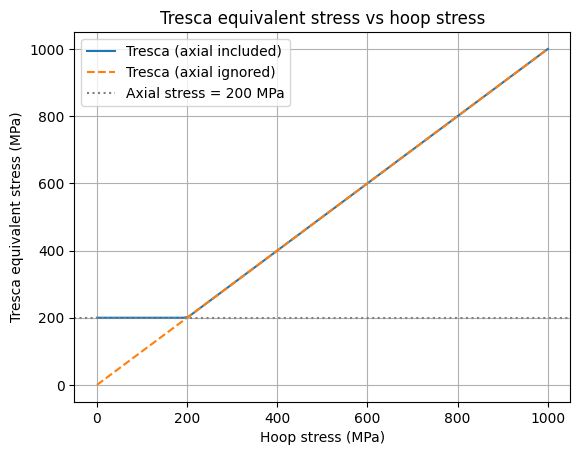

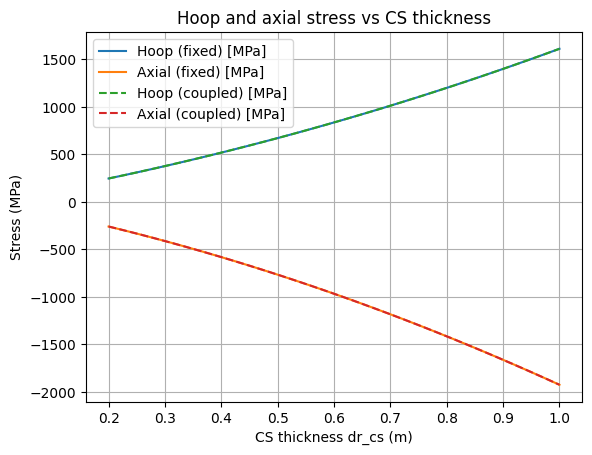

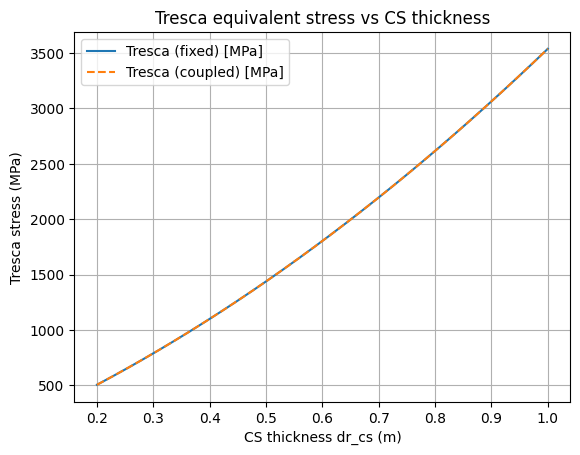

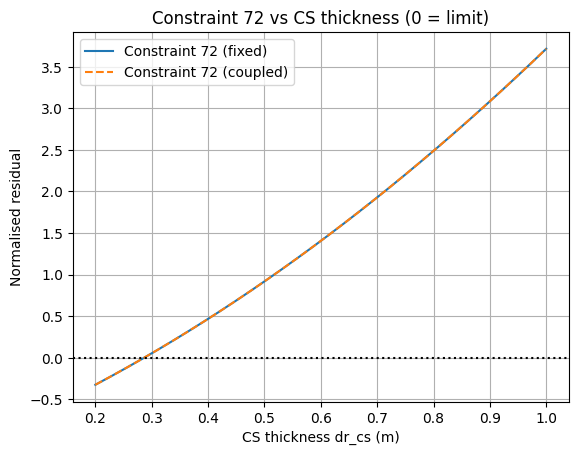

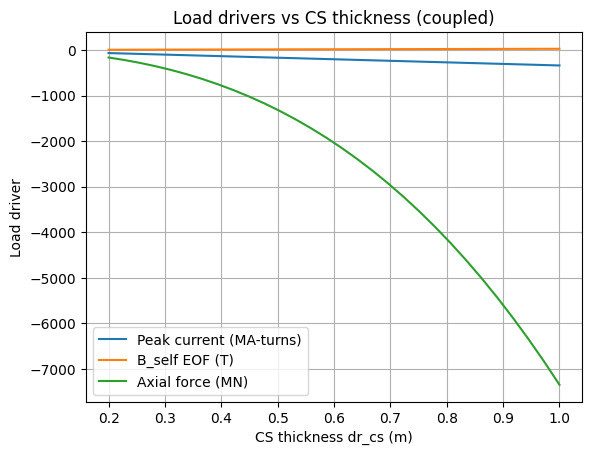

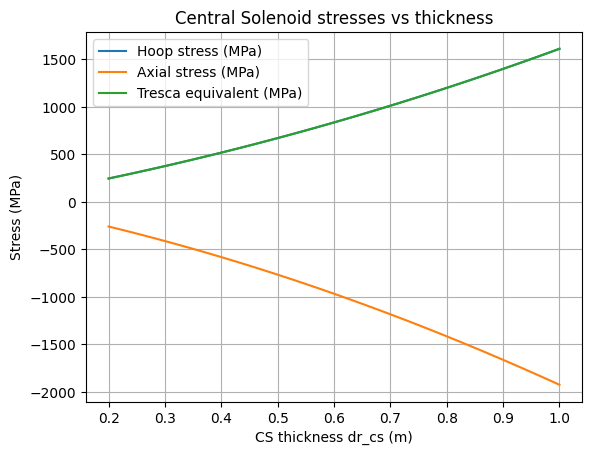

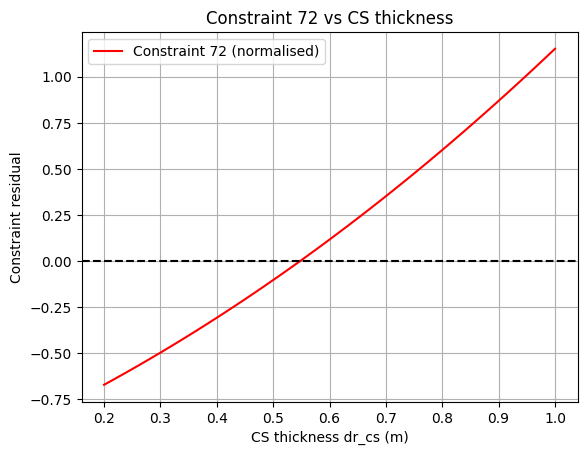

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import process
from process.main import SingleRun
from process.constraints import ConstraintManager
%matplotlib inline

# Load and run a reference case
single_run = SingleRun("data/large_tokamak_eval_IN.DAT")
single_run.run()

def run_cs_stress(thicknesses):
    """Calculate Tresca stresses and constraint values for different CS thicknesses."""
    n = len(thicknesses)
    sig_hoop = np.empty(n)
    sig_axial = np.empty(n)
    s_shear_cs_peak = np.empty(n)
    con72 = np.empty(n)

    for i, dr_cs in enumerate(thicknesses):
        # Set CS thickness
        process.data_structure.build_variables.dr_cs = dr_cs

        # Recompute CS model
        single_run.models.pfcoil.ohcalc()

        # Evaluate constraint 72
        con72_val = ConstraintManager.evaluate_constraint(72)

        # Copy values
        sig_hoop[i] = process.data_structure.pfcoil_variables.sig_hoop.item()
        sig_axial[i] = process.data_structure.pfcoil_variables.sig_axial.item()
        s_shear_cs_peak[i] = process.data_structure.pfcoil_variables.s_shear_cs_peak.item()
        con72[i] = con72_val.normalised_residual

    return sig_hoop, sig_axial, s_shear_cs_peak, con72

# Sweep CS thickness from 0.2 m to 1.0 m
thicknesses = np.linspace(0.2, 1.0, 40)
sig_hoop, sig_axial, s_shear_cs_peak, con72 = run_cs_stress(thicknesses)
print(thicknesses)
[print(s_shear_cs_peak)]
# Plot stresses
fig, ax = plt.subplots()
ax.plot(thicknesses, sig_hoop/1e6, label="Hoop stress (MPa)")
ax.plot(thicknesses, sig_axial/1e6, label="Axial stress (MPa)")
ax.plot(thicknesses, s_shear_cs_peak/1e6, label="Tresca equivalent (MPa)")
ax.set_xlabel("CS thickness dr_cs (m)")
ax.set_ylabel("Stress (MPa)")
ax.set_title("Central Solenoid stresses vs thickness")
ax.legend()
ax.grid(True)

# Plot constraint 72
fig, ax = plt.subplots()
ax.plot(thicknesses, con72, "r", label="Constraint 72 (normalised)")
ax.axhline(0.0, color="k", linestyle="--")
ax.set_xlabel("CS thickness dr_cs (m)")
ax.set_ylabel("Constraint residual")
ax.set_title("Constraint 72 vs CS thickness")
ax.legend()
ax.grid(True)
plt.show()


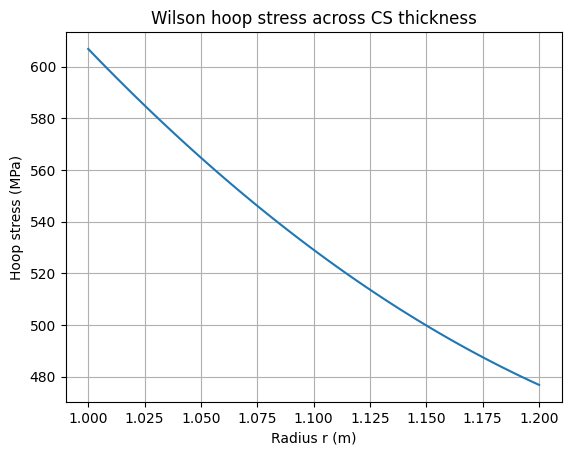

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def hoop_stress_example(r, a, b, b_a, b_b, j, poisson_steel, f_a_cs_steel):
    """Simplified standalone version of Wilson hoop stress calculation."""
    alpha = b / a
    epsilon = r / a

    # Wilson terms
    k = ((alpha * b_a - b_b) * j * a) / (alpha - 1.0)
    m = ((b_a - b_b) * j * a) / (alpha - 1.0)

    term1 = k * ((2.0 + poisson_steel) / (3.0 * (alpha + 1.0)))
    term2 = (alpha**2 + alpha + 1.0
             + alpha**2 / epsilon**2
             - epsilon * (((1.0 + 2.0*poisson_steel) * (alpha + 1.0))
                          / (2.0 + poisson_steel)))
    term3 = m * ((3.0 + poisson_steel) / 8.0)
    term4 = (alpha**2 + 1.0 + alpha**2/epsilon**2
             - epsilon**2 * ((1.0 + 3.0*poisson_steel)/(3.0 + poisson_steel)))

    s_hoop_nom = term1*term2 - term3*term4
    return s_hoop_nom / f_a_cs_steel

# Example parameters (toy values, not PROCESS defaults)
a = 1.0   # inner radius [m]
b = 1.2   # outer radius [m]
j = 1e8   # A/m2 (current density)
b_a = 5.0 # Tesla at inner radius
b_b = 0.0 # Tesla at outer radius
poisson = 0.3
f_steel = 0.5

# Sweep radial position across coil thickness
r_vals = np.linspace(a, b, 50)
sigma_hoop = [hoop_stress_example(r, a, b, b_a, b_b, j, poisson, f_steel) for r in r_vals]

plt.figure()
plt.plot(r_vals, np.array(sigma_hoop)/1e6)
plt.xlabel("Radius r (m)")
plt.ylabel("Hoop stress (MPa)")
plt.title("Wilson hoop stress across CS thickness")
plt.grid(True)
plt.show()


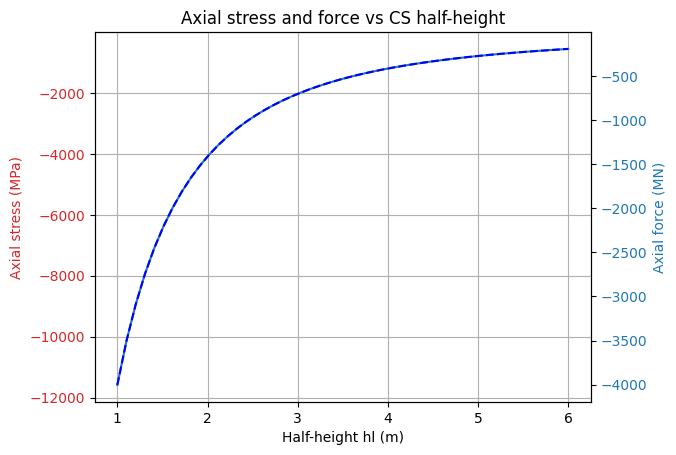

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import ellipk, ellipe

MU0 = 4e-7 * math.pi

def axial_stress_example(b, hl, ni, r_inner, r_outer, f_a_cs_steel):
    """
    Standalone version of Iwasa axial stress calculation.
    Returns (axial stress [Pa], axial force [N]).
    """
    kb2 = (4*b**2) / (4*b**2 + hl**2)
    k2b2 = (4*b**2) / (4*b**2 + 4*hl**2)

    term1 = -(MU0/2.0) * (ni / (2.0*hl))**2
    term2 = 2*hl*math.sqrt(4*b**2 + hl**2) * (ellipk(kb2) - ellipe(kb2))
    term3 = 2*hl*math.sqrt(4*b**2 + 4*hl**2) * (ellipk(k2b2) - ellipe(k2b2))

    axial_force = term1 * (term2 - term3)

    area_ax = math.pi*(r_outer**2 - r_inner**2)
    s_axial = axial_force / (f_a_cs_steel * 0.5 * area_ax)
    return s_axial, axial_force

# --- Example sweep: vary half-height ---
b = 1.2       # outer radius [m]
ni = 1e8      # total current [A]
r_inner = 1.0
r_outer = 1.2
f_steel = 0.5

hl_vals = np.linspace(1.0, 6.0, 50)  # sweep coil half-height [m]
s_ax_vals = []
Fz_vals = []

for hl in hl_vals:
    s_ax, Fz = axial_stress_example(b, hl, ni, r_inner, r_outer, f_steel)
    s_ax_vals.append(s_ax)
    Fz_vals.append(Fz)

# Convert to arrays
s_ax_vals = np.array(s_ax_vals)/1e6  # MPa
Fz_vals = np.array(Fz_vals)/1e6      # MN

# --- Plot stress vs half-height ---
fig, ax1 = plt.subplots()
ax1.plot(hl_vals, s_ax_vals, label="Axial stress (MPa)")
ax1.set_xlabel("Half-height hl (m)")
ax1.set_ylabel("Axial stress (MPa)", color="tab:red")
ax1.tick_params(axis="y", labelcolor="tab:red")
ax1.grid(True)

# Add force on second axis
ax2 = ax1.twinx()
ax2.plot(hl_vals, Fz_vals, "b--", label="Axial force (MN)")
ax2.set_ylabel("Axial force (MN)", color="tab:blue")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Axial stress and force vs CS half-height")
plt.show()



Now try increasing the tungsten impurity fraction to see if there's a change in the divertor power.

In [9]:
process.data_structure.impurity_radiation_module.f_nd_impurity_electron_array[13] = (
    5.0e-5
)
single_run.models.physics.physics()
print_values()

W frac = 5.000e-05
p_plasma_rad_mw = 2.752e+02
p_plasma_separatrix_mw = 1.112e+02


With a higher W impurity fraction, the radiated power has increased and the power incident on the divertor has decreased.

## Parameter study of W impurity
Now investigate effect of varying W impurity on impurity radiation power, divertor power and constraint 15 (L-H threshold constraint).

In [10]:
from process.constraints import ConstraintManager


def run_impurities(w_imp_fracs):
    """Calculate responses to W impurities."""
    n = w_imp_fracs.shape[0]
    p_plasma_rad_mw = np.empty(n)
    p_plasma_separatrix_mw = np.empty(n)
    p_l_h_threshold_mw = np.empty(n)
    con15 = np.empty(n)

    # Loop over W impurity values, evaluate model and store responses at each point
    for i, imp_frac in enumerate(w_imp_fracs):
        # Set W impurity fraction, then run physics model
        process.data_structure.impurity_radiation_module.f_nd_impurity_electron_array[
            13
        ] = imp_frac
        single_run.models.physics.physics()

        # Evaluate constraint equation 15 (L-H threshold constraint)
        con15_value = ConstraintManager.evaluate_constraint(15).normalised_residual

        # Need to copy values
        p_plasma_rad_mw[i] = (
            process.data_structure.physics_variables.p_plasma_rad_mw.item()
        )
        p_plasma_separatrix_mw[i] = (
            process.data_structure.physics_variables.p_plasma_separatrix_mw.item()
        )
        p_l_h_threshold_mw[i] = (
            process.data_structure.physics_variables.p_l_h_threshold_mw.item()
        )
        # Need to flip sign of constraint so negative means violated
        con15[i] = -con15_value

    return p_plasma_rad_mw, p_plasma_separatrix_mw, p_l_h_threshold_mw, con15

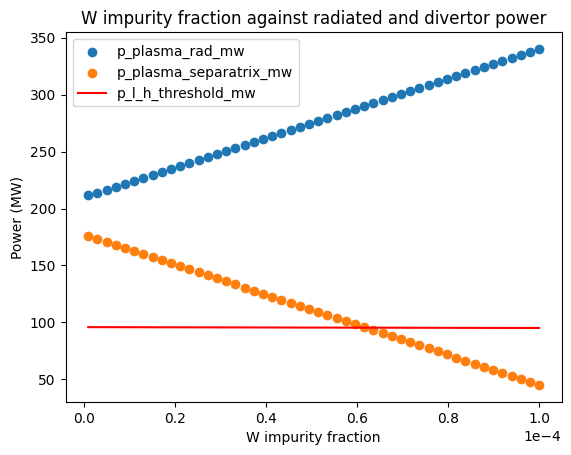

In [11]:
%matplotlib inline
# Run W impurity parameter study
w_imp_fracs = np.linspace(1.0e-6, 1.0e-4, 50)
p_plasma_rad_mw, p_plasma_separatrix_mw, p_l_h_threshold_mw, con15 = run_impurities(
    w_imp_fracs
)

fig, ax = plt.subplots()
ax.scatter(w_imp_fracs, p_plasma_rad_mw, label="p_plasma_rad_mw")
ax.scatter(w_imp_fracs, p_plasma_separatrix_mw, label="p_plasma_separatrix_mw")
ax.plot(w_imp_fracs, p_l_h_threshold_mw, "r", label="p_l_h_threshold_mw")
ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax.set_title("W impurity fraction against radiated and divertor power")
ax.set_xlabel("W impurity fraction")
ax.set_ylabel("Power (MW)")
ax.legend()

How does the L-H threshold constraint vary?

Text(0.0, -0.15, 'Violated')

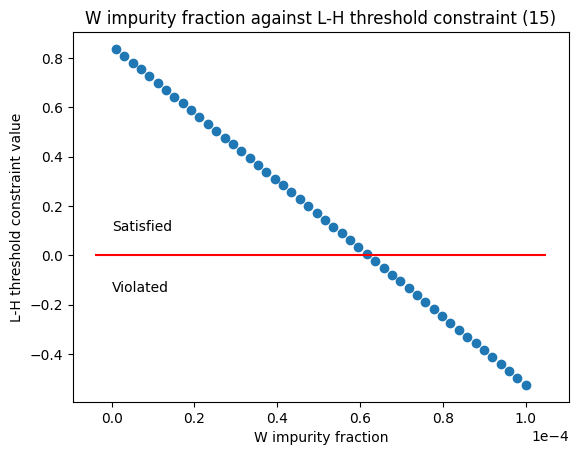

In [12]:
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(w_imp_fracs, con15, label="con15")
ax.ticklabel_format(style="sci", axis="x", scilimits=(0, 0))
ax.set_title("W impurity fraction against L-H threshold constraint (15)")
ax.set_xlabel("W impurity fraction")
ax.set_ylabel("L-H threshold constraint value")
ax.hlines(0.0, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], colors="r")
ax.annotate("Satisfied", (0.0, 0.1))
ax.annotate("Violated", (0.0, -0.15))

The constraint becomes violated for W fraction values $> 6\times10^{-5}$.

This can easily be modified to investigate behaviour of any model in Process in isolation, without running other models or optimising.